<a href="https://colab.research.google.com/github/Lalitha-DS/Assignment-3/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn


<Figure size 800x500 with 0 Axes>

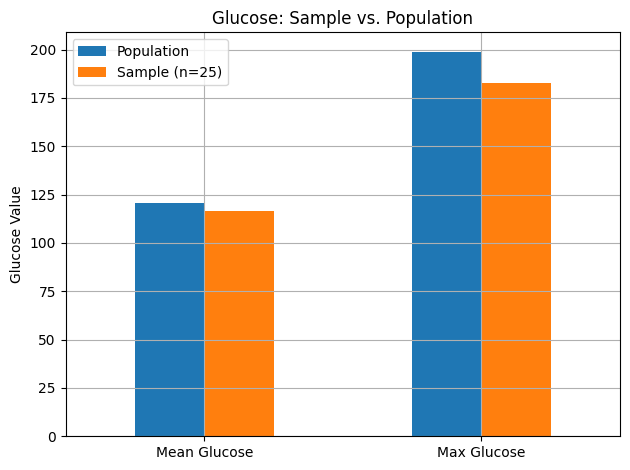

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/diabetes.csv")

# Set seed and sample
np.random.seed(42)
sample_25 = df.sample(n=25)

# Calculate Glucose statistics
pop_glucose_mean = df['Glucose'].mean()
pop_glucose_max = df['Glucose'].max()
sample_glucose_mean = sample_25['Glucose'].mean()
sample_glucose_max = sample_25['Glucose'].max()

# Compare with a bar chart
plt.figure(figsize=(8, 5))
comparison_df = pd.DataFrame({
    'Population': [pop_glucose_mean, pop_glucose_max],
    'Sample (n=25)': [sample_glucose_mean, sample_glucose_max]
}, index=['Mean Glucose', 'Max Glucose'])

comparison_df.plot(kind='bar', rot=0)
plt.title('Glucose: Sample vs. Population')
plt.ylabel('Glucose Value')
plt.grid(True)
plt.tight_layout()
plt.show()


98th Percentile of BMI in Population: 47.53
98th Percentile of BMI in Sample (n=25): 40.25


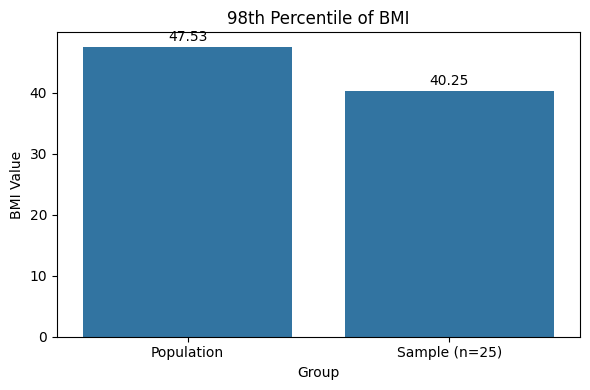

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 98th percentile calculations (assuming df and sample_25 already exist)
pop_bmi_98 = np.percentile(df['BMI'], 98)
sample_bmi_98 = np.percentile(sample_25['BMI'], 98)

# Print the values
print(f"98th Percentile of BMI in Population: {pop_bmi_98:.2f}")
print(f"98th Percentile of BMI in Sample (n=25): {sample_bmi_98:.2f}")

# Create DataFrame for plotting
data = pd.DataFrame({
    'Group': ['Population', 'Sample (n=25)'],
    'BMI_98th': [pop_bmi_98, sample_bmi_98]
})


plt.figure(figsize=(6, 4))
sns.barplot(data=data, x='Group', y='BMI_98th')
plt.title('98th Percentile of BMI')
plt.ylabel('BMI Value')

# Add text labels on bars
for index, row in data.iterrows():
    plt.text(index, row['BMI_98th'] + 0.5, f"{row['BMI_98th']:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


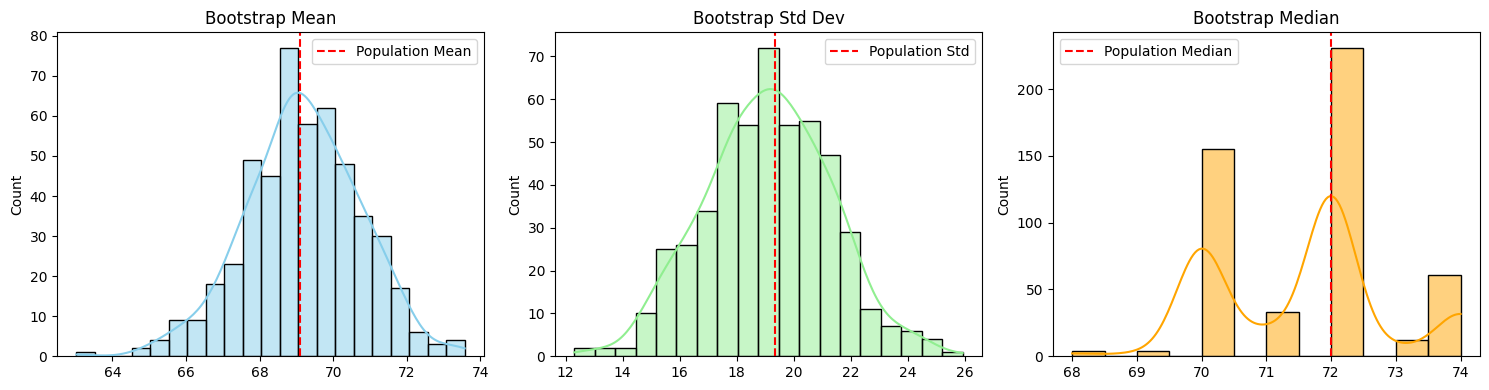

Population BloodPressure - Mean: 69.11, Std: 19.36, Median: 72.0
Bootstrap Averages - Mean: 69.18, Std: 19.08, Median: 71.53


In [5]:
# Bootstrap sampling: 500 samples of 150 with replacement
bootstrap_means = []
bootstrap_stds = []
bootstrap_medians = []

for _ in range(500):
    sample = df.sample(n=150, replace=True)
    bp = sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_medians.append(np.percentile(bp, 50))

# Population stats
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_median = np.percentile(df['BloodPressure'], 50)

# Plot comparisons
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(bootstrap_means, kde=True, color='skyblue')
plt.axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
plt.title('Bootstrap Mean')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(bootstrap_stds, kde=True, color='lightgreen')
plt.axvline(pop_std, color='red', linestyle='--', label='Population Std')
plt.title('Bootstrap Std Dev')
plt.legend()

plt.subplot(1, 3, 3)
sns.histplot(bootstrap_medians, kde=True, color='orange')
plt.axvline(pop_median, color='red', linestyle='--', label='Population Median')
plt.title('Bootstrap Median')
plt.legend()

plt.tight_layout()
plt.show()

# Print numerical summary
print(f"Population BloodPressure - Mean: {pop_mean:.2f}, Std: {pop_std:.2f}, Median: {pop_median}")
print(f"Bootstrap Averages - Mean: {np.mean(bootstrap_means):.2f}, Std: {np.mean(bootstrap_stds):.2f}, Median: {np.mean(bootstrap_medians):.2f}")
